<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_R/blob/main/Colab_Notebook/02_07_03_01_survival_analysis_exponential_model_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![All-test](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3.1 The Exponential Survival Model


This tutorial introduces the Exponential Model in survival analysis using R. We'll cover the basics of the model, how to fit it, interpret results, make predictions, and visualize outcomes. The Exponential Model is a parametric approach that assumes a constant hazard rate over time, making it suitable for scenarios where the risk of the event (e.g., failure or death) doesn't change with time. It's simple but often too restrictive for real-world data, where hazards may vary.


## Overview


The Exponential Model is a fundamental parametric model in survival analysis, assuming a constant hazard rate over time. This makes it simple but restrictive, as it implies the risk of an event (e.g., death, failure) does not change with time. Below, I explain the mathematical forms of the **probability density function (PDF)**, **survival function**, and **hazard function** for the Exponential Model, keeping the explanation concise yet comprehensive.


### Key Parameter


The Exponential Model is characterized by a single parameter, $\lambda > 0$, known as the **rate parameter** (or hazard rate). The mean survival time is $1/\lambda$, and the model assumes a memoryless property, meaning the probability of an event occurring does not depend on how much time has already passed.


###  Probability Density Function (PDF)


The PDF describes the probability distribution of the survival time $T$, a continuous random variable representing the time until the event occurs.

$$
  f(t) = \lambda e^{-\lambda t}, \quad t \geq 0, \quad \lambda > 0
$$

  - $f(t)$ gives the probability density of the event occurring at exactly time $t$.
  
  - The exponential decay term $e^{-\lambda t}$ reflects that longer survival times are less likely.
  
  - The parameter $\lambda$ scales the density, with higher $\lambda$ indicating a faster decay (shorter survival times).


### Survival Function


The survival function $S(t)$ represents the probability that the event has not occurred by time $t$, i.e., $P(T > t)$.

$$
  S(t) = e^{-\lambda t}, \quad t \geq 0
$$

  - Derived from the cumulative distribution function (CDF): $S(t) = 1 - F(t)$, where $F(t) = P(T \leq t) = 1 - e^{-\lambda t}$.

  - $S(t)$ decreases exponentially, starting at $S(0) = 1$ (100% survival at $t = 0$) and approaching 0 as $t \to \infty$.
  
  - A higher $\lambda$ leads to a steeper decline, indicating shorter survival times.


### Hazard Function


The hazard function $h(t)$ represents the instantaneous rate of occurrence of the event at time $t$, given survival up to that time. It is defined as $h(t) = \frac{f(t)}{S(t)}$.

$$
h(t) = \lambda, \quad t \geq 0
$$

  - The hazard is constant over time, a hallmark of the exponential model.
  
  - This implies the risk of the event (e.g., failure) remains the same regardless of how long the subject has survived.
  
  - $\lambda$ directly represents the hazard rate, e.g., if $\lambda = 0.01$, there’s a 0.01 probability of the event per unit of time.


### Relationships and Derivations


- **PDF from Hazard and Survival**:

$$
  f(t) = h(t) \cdot S(t) = \lambda \cdot e^{-\lambda t}
$$
- **Cumulative Hazard**: The cumulative hazard function is $H(t) = \int_0^t h(u) \, du = \lambda t$. This relates to the survival function via:

$$
  S(t) = e^{-H(t)} = e^{-\lambda t}
$$
- **Mean and Variance**:

  - Mean survival time: $E[T] = 1/\lambda$.
  
  - Variance: $\text{Var}(T) = 1/\lambda^2$.


### Practical Notes


- The constant hazard assumption ($h(t) = \lambda$) is often unrealistic in practice (e.g., in medical or reliability data, where risks may increase or decrease over time). Thus, the exponential model is best for scenarios like radioactive decay or certain mechanical systems with constant failure rates.




## Setup R in Python Runtype - Install {rpy2}
{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-cp312-cp312-linux_x86_64.whl


## Mount Google Drive

In [ ]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Implementation in R


We'll use the `survival` package, which is standard for survival analysis in R. For more advanced parametric modeling, you could explore packages like `flexsurv`, but we'll stick to basics here.


### Install Required R Packages


Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:


In [ ]:
%%R
packages <-c(
		 'tidyverse',
		 'survival',
		 'flexsurv',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		 'ggfortify',
		 'timereg',
		 'cmprsk',
		 'condSURV',
		 'riskRegression'
		 )


### Install missing packages

In [ ]:
%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')
devtools::install_github("ItziarI/WeDiBaDis", lib='drive/My Drive/R/')

In [ ]:
%%R
install.packages("flexsurv", lib='drive/My Drive/R/')

### Verify installation

In [ ]:
%%R
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
     tidyverse       survival       flexsurv      survminer      ggsurvfit 
          TRUE           TRUE           TRUE           TRUE           TRUE 
    tidycmprsk      ggfortify        timereg         cmprsk       condSURV 
          TRUE           TRUE           TRUE           TRUE           TRUE 
riskRegression 
          TRUE 


### Load Packages

In [ ]:
%%R
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
 [1] "package:riskRegression" "package:condSURV"       "package:cmprsk"        
 [4] "package:timereg"        "package:ggfortify"      "package:tidycmprsk"    
 [7] "package:ggsurvfit"      "package:survminer"      "package:ggpubr"        
[10] "package:flexsurv"       "package:survival"       "package:lubridate"     
[13] "package:forcats"        "package:stringr"        "package:dplyr"         
[16] "package:purrr"          "package:readr"          "package:tidyr"         
[19] "package:tibble"         "package:ggplot2"        "package:tidyverse"     
[22] "package:tools"          "package:stats"          "package:graphics"      
[25] "package:grDevices"      "package:utils"          "package:datasets"      
[28] "package:methods"        "package:base"          


### Data


We'll use the built-in `lung` dataset from the `survival` package for demonstration. This dataset contains survival times for patients with advanced lung cancer. Key variables:

   - `time`: Survival time in days.
   - `status`: Censoring indicator (1 = censored, 2 = dead; we'll recode it to 0/1 for standard use).
   - Covariates like `age`, `sex`, etc.



In [ ]:
%%R
data(lung)
head(lung)  # View the first few rows

  inst time status age sex ph.ecog ph.karno pat.karno meal.cal wt.loss
1    3  306      2  74   1       1       90       100     1175      NA
2    3  455      2  68   1       0       90        90     1225      15
3    3 1010      1  56   1       0       90        90       NA      15
4    5  210      2  57   1       1       90        60     1150      11
5    1  883      2  60   1       0      100        90       NA       0
6   12 1022      1  74   1       1       50        80      513       0



   Note: For your own data, ensure you have a time variable and a status indicator (0 = censored, 1 = event occurred).


### Preparing the Data


In survival analysis, we use the `Surv()` function to create a survival object that handles time and censoring.


In [ ]:
%%R
# Recode status: 1 = censored (0), 2 = dead (1)
lung$status <- lung$status - 1
# Create survival object
surv_object <- Surv(time = lung$time, event = lung$status)


### Fitting the Exponential Model


The Exponential Model can be fit using `survreg()` from the `survival` package, which implements an Accelerated Failure Time (AFT) framework. Specify `dist = "exponential"` for the exponential distribution.


#### Without Covariates (Intercept-Only Model)


This estimates a single parameter: the constant hazard rate (or equivalently, the scale parameter).


In [ ]:
%%R
# Fit the model
exp_model <- survreg(surv_object ~ 1, data = lung, dist = "exponential")
# View summary
summary(exp_model)


Call:
survreg(formula = surv_object ~ 1, data = lung, dist = "exponential")
             Value Std. Error    z      p
(Intercept) 6.0445     0.0778 77.6 <2e-16

Scale fixed at 1 

Exponential distribution
Loglik(model)= -1162.3   Loglik(intercept only)= -1162.3
Number of Newton-Raphson Iterations: 4 
n= 228 




Output interpretation:

- The `Scale` parameter is the mean survival time (since exponential mean = 1 / hazard rate).

- For exponential, the hazard rate λ = 1 / exp(Intercept).

- Log-likelihood and p-values help assess fit.


#### With Covariates


Let's include `age` and `sex` (1 = male, 2 = female) as predictors. In AFT models, coefficients represent how covariates accelerate or decelerate time.



In [ ]:
%%R
# Try with starting estimates if convergence fails
exp_model_cov<- survreg(Surv(time, status) ~ age + sex, data = lung, dist = "exponential")
# View summary
summary(exp_model_cov)


Call:
survreg(formula = Surv(time, status) ~ age + sex, data = lung, 
    dist = "exponential")
               Value Std. Error     z      p
(Intercept)  6.35967    0.63547 10.01 <2e-16
age         -0.01562    0.00911 -1.72  0.086
sex          0.48093    0.16709  2.88  0.004

Scale fixed at 1 

Exponential distribution
Loglik(model)= -1156.1   Loglik(intercept only)= -1162.3
	Chisq= 12.48 on 2 degrees of freedom, p= 0.002 
Number of Newton-Raphson Iterations: 4 
n= 228 




Interpretation:

- Coefficients are on the log-scale for time. A positive coefficient means the covariate increases survival time (decelerates failure).
- For example, if the coefficient for `sex` is positive, females have longer survival times.
- Hazard ratio for a covariate: exp(-coefficient), since it's AFT.

To test model significance, use ANOVA or compare to a null model:


In [ ]:
%%R
anova(exp_model_cov)

Analysis of Deviance Table

 distribution with  link

Response: Surv(time, status)

Scale fixed at 1 

Terms added sequentially (first to last)
     Df Deviance Resid. Df  -2*LL Pr(>Chi)   
NULL                   227 2324.7            
age   1   3.7804       226 2320.9 0.051855 . 
sex   1   8.6978       225 2312.2 0.003186 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Interpreting the Results


- **Hazard Function**: Constant h(t) = λ = 1 / exp(Intercept) for the null model.

- **Survival Function**: S(t) = exp(-λt).

- **Confidence Intervals**: Extract using `confint(exp_model_cov)`.

- **Goodness-of-Fit**: Compare AIC with other models (e.g., Weibull via `dist = "weibull"`). Lower AIC indicates better fit.


In [ ]:
%%R
AIC(exp_model_cov)

[1] 2318.198



If the constant hazard assumption seems violated (check via plots in Step 5), consider more flexible models like Weibull.




### Making Predictions


Predict survival times or probabilities.


#### Predicted Survival Times


For new data or fitted values:


In [ ]:
%%R
# Prediction for new data (60-year-old male)
new_data <- data.frame(age = 60 - mean(lung$age), sex = 1)
median_time <- predict(exp_model_cov, newdata = new_data, type = "response")
print("Median survival time (days):")
print(median_time)

[1] "Median survival time (days):"
       1 
971.4902 


#### Survival Probabilities


Use `survfit()` on the fitted model for curves, or calculate manually.


In [ ]:
%%R
# Survival probability at t=500 days
surv_prob <- psurvreg(500, mean = predict(exp_model_cov, newdata = new_data, type = "lp"),
                      scale = exp_model_cov$scale, distribution = "exponential")
print("Survival probability at t=500 days:")
print(surv_prob)

[1] "Survival probability at t=500 days:"
[1] 0.4023041


### Plotting and Visualization


Visualize to assess fit and communicate results.


#### Survival Curve

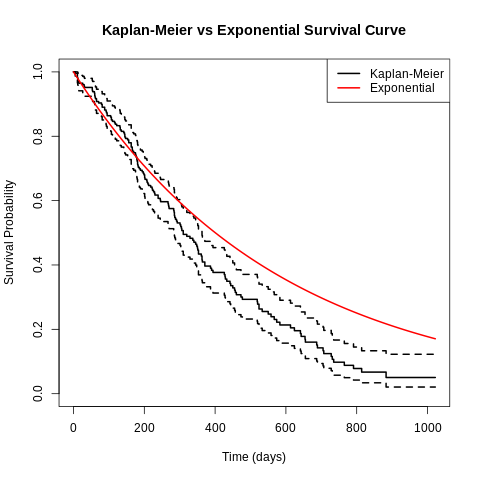

In [ ]:
%%R
# Fit Kaplan-Meier for comparison
km_fit <- survfit(surv_object ~ 1)

# Plot KM curve
plot(km_fit, main = "Kaplan-Meier vs Exponential Survival Curve",
     xlab = "Time (days)", ylab = "Survival Probability",
     col = "black", lwd = 2)

# Add Weibull curve (null model)
t_seq <- seq(0, max(lung$time), length.out = 100)
lambda <- exp(-coef(exp_model_cov)[1] / exp_model_cov$scale)
p <- 1 / exp_model_cov$scale
surv_exp <- exp(-(lambda * t_seq)^p)
lines(t_seq, surv_exp, col = "red", lwd = 2)
legend("topright", c("Kaplan-Meier", "Exponential"), col = c("black", "red"), lwd = 2)




If the exponential curve deviates much from KM, the assumption may not hold.


### Model Diagnostics for the Exponential Model

Diagnostics for the exponential model aim to:

#### Check the Constant Hazard Assumption


The exponential model assumes a constant hazard rate ($h(t) = \lambda$). We can verify this using a log-cumulative hazard plot, where the cumulative hazard $H(t) = \lambda t$ should be linear.


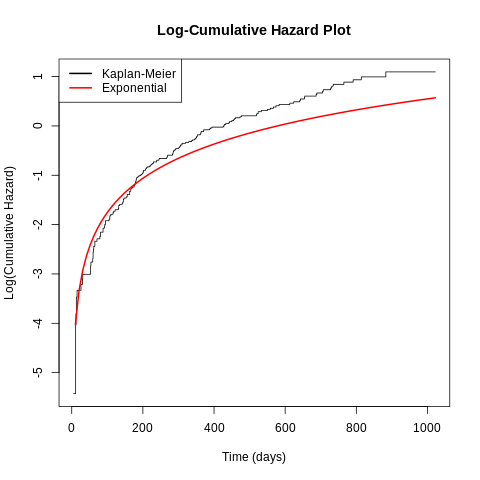

In [ ]:
%%R
# 1. Log-Cumulative Hazard Plot (Check constant hazard)
km_cumhaz <- -log(km_fit$surv)
valid <- is.finite(km_cumhaz) & km_fit$surv > 0  # Exclude Inf and zero survival
if (sum(valid) > 0) {
  plot(km_fit$time[valid], log(km_cumhaz[valid]), type = "s",
       main = "Log-Cumulative Hazard Plot",
       xlab = "Time (days)", ylab = "Log(Cumulative Hazard)")
  lines(t_seq, log(lambda * t_seq), col = "red", lwd = 2)
  legend("topleft", c("Kaplan-Meier", "Exponential"), col = c("black", "red"), lwd = 2)
} else {
  warning("No valid data for log-cumulative hazard plot. Check km_fit$surv.")
  # Fallback: Plot cumulative hazard without log
  plot(km_fit$time[km_fit$surv > 0], km_cumhaz[km_fit$surv > 0], type = "s",
       main = "Cumulative Hazard Plot (Fallback)",
       xlab = "Time (days)", ylab = "Cumulative Hazard")
  lines(t_seq, lambda * t_seq, col = "red", lwd = 2)
}


#### Residual Analysis

Examine residuals (e.g., Cox-Snell or deviance residuals) to assess model fit and identify outliers or influential points.

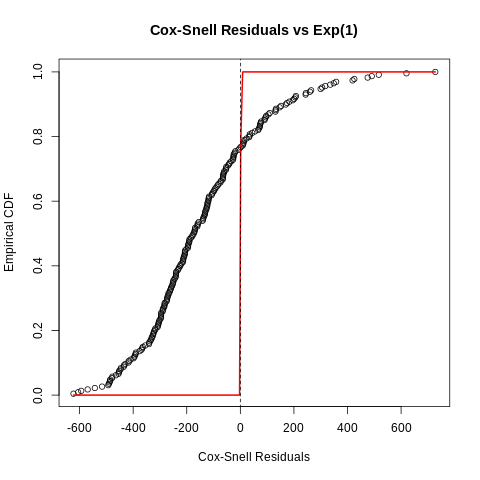

In [ ]:
%%R
# 2. Cox-Snell Residuals
residuals_cs <- (lung$time - predict(exp_model_cov, type = "response")) / exp_model_cov$scale
plot(sort(residuals_cs), (1:length(residuals_cs))/length(residuals_cs),
     main = "Cox-Snell Residuals vs Exp(1)",
     xlab = "Cox-Snell Residuals", ylab = "Empirical CDF")
lines(sort(residuals_cs), pexp(sort(residuals_cs), rate = 1), col = "red", lwd = 2)
abline(0, 1, lty = 2)

## Summary and Conclusion


The Exponential Model is a fundamental parametric approach in survival analysis, assuming a constant hazard rate over time. While simple and interpretable, it may not fit all datasets well due to its restrictive assumption. This tutorial covered:
- Preparing survival data in R.
- Fitting the Exponential Model using `survreg()`.
- Interpreting coefficients and model fit.
- Making predictions for survival times and probabilities.
- Visualizing survival curves and assessing model assumptions.
- Comparing with non-parametric methods like Kaplan-Meier.

For more complex hazard patterns, consider alternative parametric models (e.g., Weibull) or semi-parametric approaches (e.g., Cox model). Always validate assumptions and fit using diagnostics and goodness-of-fit measures. Practice with real datasets to gain proficiency in survival analysis techniques.


## Resources


**Books**

1. **"Survival Analysis: Techniques for Censored and Truncated Data" by Klein & Moeschberger** - Covers exponential model theory and R examples. Available on SpringerLink, Amazon.
2. **"Applied Survival Analysis" by Hosmer, Lemeshow, & May** - Practical guide with R code for exponential models. Available on Wiley, Amazon.
3. **"Modeling Survival Data" by Therneau & Grambsch** - Focuses on R’s `survival` package. Available on Springer, Amazon.

**Online Tutorials**

4. **R `survival` Package Documentation** - Details `survreg` for exponential models. Free at [CRAN](https://cran.r-project.org/package=survival) or `vignette("survival")`.
5. **UCLA IDRE Survival Analysis** - Beginner-friendly R tutorial. [Link](https://stats.idre.ucla.edu/r/seminars/survival-analysis-with-r/).
6. **DataCamp: Survival Analysis in R** - Interactive course with exponential model exercises. [Link](https://www.datacamp.com/courses/survival-analysis-in-r) (subscription may be required).

**Papers**

7. **"Parametric Survival Models" by Patrick Breheny** - Lecture notes with R code. Free at [Breheny’s Notes](https://myweb.uiowa.edu/pbreheny/7210/f19/notes.html).

**Courses/Videos**

8. **Coursera: Survival Analysis in R (Imperial College)** - Includes exponential model labs. [Link](https://www.coursera.org/learn/survival-analysis-r-public-health) (audit free).
9. **YouTube: MarinStatsLectures** - Free video tutorials on exponential models in R. [Link](https://www.youtube.com/c/MarinStatsLectures-RProgrammingStats).

**Software-Specific**

10. **RPubs Tutorials** - Community-driven R code for exponential models. Search “survival analysis exponential” on [RPubs](https://rpubs.com/).



In [ ]:
%%R
rm(list = ls())